In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Load full CIFAR10 dataset

In [2]:
(x_train,y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print("Shape:")
print(x_train.shape,y_train.shape,x_test.shape, y_test.shape)
print('Example of dataset')
print(x_train.view)


# Flatten label
y_train=y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

# Normalize data
x_train = x_train/255.
x_test = x_test/255.
print(y_train.shape, y_test.shape)


Shape:
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
Example of dataset
<built-in method view of numpy.ndarray object at 0x0000019AD542B150>
(50000,) (10000,)


## Visualize data samples

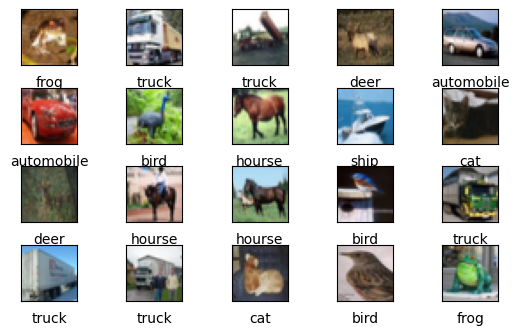

<Figure size 3000x3000 with 0 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'hourse', 'ship', 'truck']

def plot_categories(x_train, y_train):
  plt.figure(figsize=(30,30))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

plot_categories(x_train, y_train)

# Build model with model_architecture.json

In [4]:
import os
import json


with open('../Server/model_architecture.json','r') as file:
    json_data = file.read()
model_architecture = json.loads(json_data)
model = tf.keras.models.model_from_json(model_architecture)


model.compile(
    "adam",
    "sparse_categorical_crossentropy",
    metrics=["accuracy",]
    )
# model.summary()


## Training model

In [5]:
model_history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 13s 7ms/step - loss: 1.5739 - accuracy: 0.4454 - val_loss: 1.1912 - val_accuracy: 0.5780
Epoch 2/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1336 - accuracy: 0.5983 - val_loss: 0.9899 - val_accuracy: 0.6513
Epoch 3/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9631 - accuracy: 0.6626 - val_loss: 0.8493 - val_accuracy: 0.7002
Epoch 4/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8547 - accuracy: 0.6971 - val_loss: 0.8136 - val_accuracy: 0.7089
Epoch 5/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7838 - accuracy: 0.7273 - val_loss: 0.7593 - val_accuracy: 0.7338
Epoch 6/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7289 - accuracy: 0.7448 - val_loss: 0.7294 - val_accuracy: 0.7445
Epoch 7/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.6767 - accuracy: 0.7637 - val_loss: 0.7007 - val_accuracy

## Eveluation the model

In [6]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print('\nModel Test accuracy:', accuracy)
print('\nModel Test loss:', loss)

313/313 - 1s - loss: 0.7113 - accuracy: 0.7595 - 800ms/epoch - 3ms/step

Model Test accuracy: 0.7595000267028809

Model Test loss: 0.7113088369369507


## Predict and plot the confussion matrix

313/313 [==============================] - 1s 2ms/step


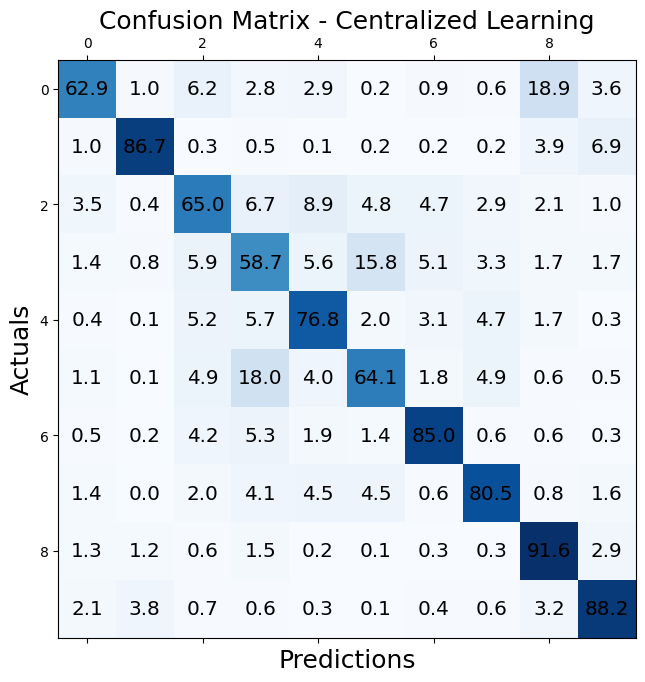

In [7]:
predictions = model.predict(x_test)
model_preds = predictions.argmax(axis=1)
confusion  = tf.math.confusion_matrix(
    labels=y_test,
    predictions=model_preds,
    num_classes=10    
)
conf_matrix = np.array(confusion)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha = 1)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j]/10, va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - Centralized Learning', fontsize=18)
plt.show()        


## Plot the loss and accuracy

[0.578000009059906, 0.6513000130653381, 0.7002000212669373, 0.708899974822998, 0.7337999939918518, 0.7444999814033508, 0.7519999742507935, 0.7508000135421753, 0.7639999985694885, 0.7573000192642212] [1.191244125366211, 0.9899486303329468, 0.8493399620056152, 0.8135613203048706, 0.7593414783477783, 0.7294191122055054, 0.7006703615188599, 0.7309212684631348, 0.6797069311141968, 0.6975678205490112]


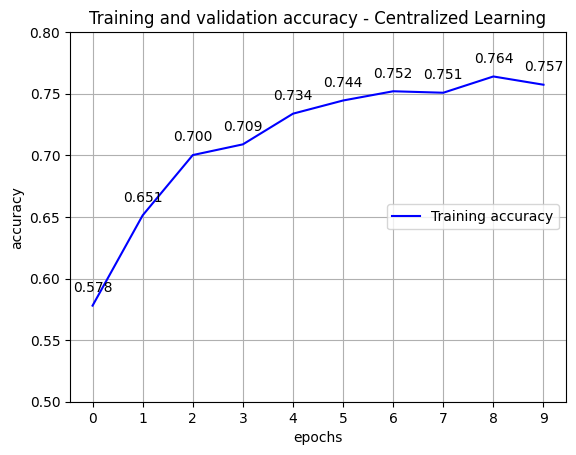

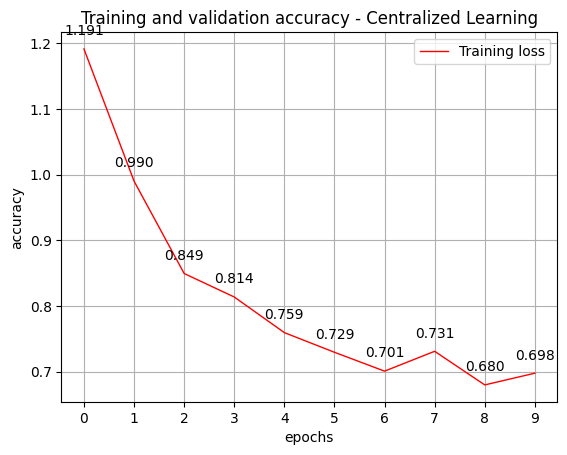

In [8]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']


# categorical_acc = model_history.history['categorical_accuracy']
print(val_acc, val_loss)

epochs = range(len(acc))
plt.grid()
# plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Training accuracy')
# plt.plot(epochs, loss, 'r', linestyle='dashed', linewidth=1, label='Training loss')
# plt.plot(epochs, val_loss, 'r', linestyle='dashed',linewidth=1,label='Validation loss')
plt.yticks(np.arange(0.5, 0.8, step=0.05))
plt.title('Training and validation accuracy - Centralized Learning')
plt.xlabel('epochs')
plt.xticks(epochs)
plt.ylabel('accuracy')
plt.legend(loc=5)
for x,y in zip(epochs,val_acc):
    label = "{:.3f}".format(y)
    plt.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center')
plt.show()

plt.grid()
plt.plot(epochs, val_loss, 'r',linewidth=1,label='Training loss')
plt.title('Training and validation accuracy - Centralized Learning')
plt.xlabel('epochs')
plt.xticks(epochs)
plt.ylabel('accuracy')
plt.legend(loc=0)
for x,y in zip(epochs,val_loss):
    label = "{:.3f}".format(y)
    plt.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center')
plt.show()



## Plot ROC AUC curve 

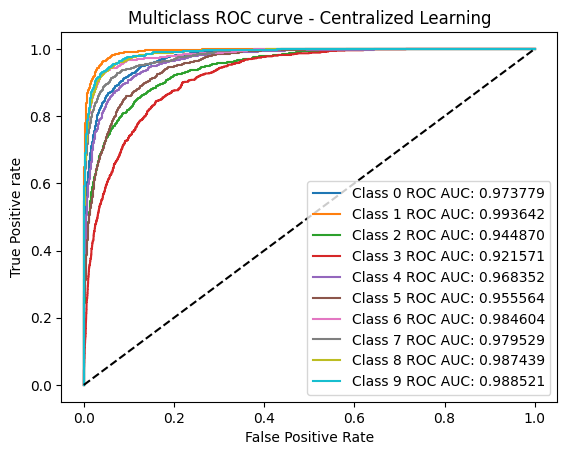

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


n_class = 10
fpr = {}
tpr = {}
thresh ={}
roc_aucs = []

y_true=[]

for i in range(n_class):
    y_true.append(y_test==i)    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, predictions[:,i], pos_label=i)
    roc_aucs.append(roc_auc_score(y_true[i], predictions[:,i]))


for i in range(n_class):    
    plt.plot(fpr[i],tpr[i],label='Class {} ROC AUC: {:3f}'.format(i,roc_aucs[i]))
plt.plot([0,1],[0,1],'k--')
plt.title('Multiclass ROC curve - Centralized Learning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()



## Plot PR curve

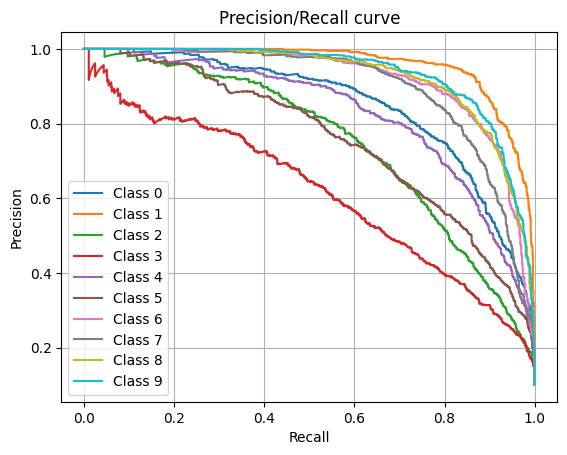

In [18]:
from sklearn.metrics import precision_recall_curve

n_class = 10
precision = {}
recall = {}
thresh ={}
y_true=[]

for i in range(n_class):
    y_true.append(y_test==i)    
    precision[i], recall[i], thresh[i] = precision_recall_curve(y_true[i], predictions[:,i])


for i in range(n_class):    
    plt.plot(recall[i],precision[i],label='Class {}'.format(i))
plt.grid()
plt.title('Precision/Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()  

## Classification report

In [20]:
from sklearn.metrics import classification_report

model_report = classification_report(
    y_true = y_test,
    y_pred = model_preds,
)

print(model_report)

              precision    recall  f1-score   support

           0       0.83      0.63      0.72      1000
           1       0.92      0.87      0.89      1000
           2       0.68      0.65      0.67      1000
           3       0.56      0.59      0.58      1000
           4       0.73      0.77      0.75      1000
           5       0.69      0.64      0.66      1000
           6       0.83      0.85      0.84      1000
           7       0.82      0.81      0.81      1000
           8       0.73      0.92      0.81      1000
           9       0.82      0.88      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

